In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('2018Floor3_abnormals_isolation_forest.csv')

In [3]:
df.head()

,z1_AC2(kW),z1_AC4(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),z5_S1(lux),abnormal
0,0.0,8.74,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.07,0.0,0.0,0.0,0.0,0.15,62.86,0.0,0
1,0.0,8.74,0.23,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.87,0.0,0
2,0.0,8.61,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0,0
3,0.0,8.81,0.23,62.50,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0,0
4,0.0,8.89,0.22,62.51,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.88,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264960 entries, 0 to 264959
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   z1_AC2(kW)    264960 non-null  float64
 1   z1_AC4(kW)    264960 non-null  float64
 2   z1_Plug(kW)   264960 non-null  float64
 3   z1_S1(RH%)    264960 non-null  float64
 4   z1_S1(lux)    264960 non-null  float64
 5   z2_AC1(kW)    264960 non-null  float64
 6   z2_Light(kW)  264960 non-null  float64
 7   z2_Plug(kW)   264960 non-null  float64
 8   z2_S1(RH%)    264960 non-null  float64
 9   z2_S1(lux)    264960 non-null  float64
 10  z3_Light(kW)  264960 non-null  float64
 11  z3_Plug(kW)   264960 non-null  float64
 12  z4_AC1(kW)    264960 non-null  float64
 13  z4_Light(kW)  264960 non-null  float64
 14  z4_Plug(kW)   264960 non-null  float64
 15  z4_S1(RH%)    264960 non-null  float64
 16  z4_S1(lux)    264960 non-null  float64
 17  z5_AC1(kW)    264960 non-null  float64
 18  z5_L

In [5]:
df.describe()

,z1_AC2(kW),z1_AC4(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),z5_S1(lux),abnormal
count,264960.000000,264960.000000,264960.000000,264960.000000,264960.000000,264960.000000,264960.000000,264960.000000,264960.000000,264960.000000,...,264960.000000,264960.000000,264960.000000,264960.000000,264960.000000,264960.00000,264960.000000,264960.000000,264960.000000,264960.000000
mean,0.008683,3.803949,0.928976,22.589096,5.356416,2.690791,0.732191,0.229791,24.431651,5.290202,...,1.353310,0.353296,21.797965,9.402042,1.332084,0.41979,0.209078,23.409161,4.825600,0.010002
std,0.135939,8.419933,1.136103,29.114067,12.665727,6.317733,1.085057,0.238676,31.233536,14.079086,...,1.604124,0.441460,28.968580,21.171286,3.474546,0.71509,0.211742,30.857518,14.095717,0.099506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,...,0.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.050000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.00000,0.150000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.270000,58.370000,0.000000,0.000000,1.810000,0.300000,62.520000,0.000000,...,3.340000,0.620000,58.130000,0.000000,0.000000,0.64000,0.250000,61.930000,0.000000,0.000000
max,20.280000,49.220000,87.110000,69.400000,54.000000,44.350000,32.590000,4.770000,75.700000,64.000000,...,26.700000,9.520000,71.950000,82.000000,54.580000,58.61000,3.140000,73.900000,60.000000,1.000000


In [6]:
label_counts = df['abnormal'].value_counts()
label_counts

0    262310
1      2650
Name: abnormal, dtype: int64

In [7]:
df.duplicated().sum()

67134

In [8]:
df = df.drop_duplicates()

In [9]:
df.isna().sum().sum()

0

In [10]:
data= df.copy()

## Data Balancing

In [11]:
X, y = df.drop(labels=['abnormal'], axis=1), df['abnormal']

X.shape ,y.shape

((197826, 22), (197826,))

In [13]:
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import numpy as np

# Shuffle and split into chunks
chunk_size = 100000
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)
chunks = [(X_shuffled[i:i+chunk_size], y_shuffled[i:i+chunk_size])
          for i in range(0, len(y), chunk_size)]

# Apply SMOTE on each chunk with 60% ratio for Attack
X_balanced_list, y_balanced_list = [], []
for X_chunk, y_chunk in chunks:
    smote = SMOTE(sampling_strategy=0.6, random_state=42, n_jobs=-1)  # abnormal will be 60% of Normal
    X_bal, y_bal = smote.fit_resample(X_chunk, y_chunk)
    X_balanced_list.append(X_bal)
    y_balanced_list.append(y_bal)

# Concatenate all balanced chunks
X_balanced = np.concatenate(X_balanced_list, axis=0)
y_balanced = np.concatenate(y_balanced_list, axis=0)

# Print the distribution after balancing
from collections import Counter
print("Balanced dataset shape:", Counter(y_balanced))


C:\Users\nadaa\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:374: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  FutureWarning,
C:\Users\nadaa\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:374: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  FutureWarning,


Balanced dataset shape: Counter({0: 195176, 1: 117105})


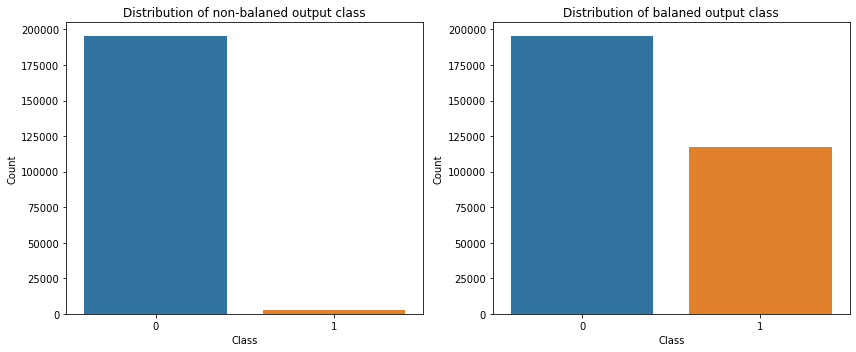

In [14]:
plt.figure(figsize=(12, 5))

# Plot y_train distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title("Distribution of non-balaned output class")
plt.xlabel("Class")
plt.ylabel("Count")

# Plot y_test distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_balanced)
plt.title("Distribution of balaned output class")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [15]:
# Create a DataFrame for the balanced dataset
balanced_data = pd.DataFrame(X_balanced, columns=X.columns)  # Use the original column names
balanced_data['abnormal'] = y_balanced  # Add the target (label) column

# Save the balanced dataset to a CSV file
balanced_data.to_csv('Isolated_ Forest_Balanced_data.csv', index=False)

print("The balanced dataset has been saved to 'Isolated_ Forest_Balanced_data.csv'.")

The balanced dataset has been saved to 'Isolated_ Forest_Balanced_data.csv'.


## Data splitting

In [21]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the data DataFrame
X = balanced_data.drop(columns=['abnormal'])  
y = balanced_data['abnormal'] 

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  
    random_state=42,
)


X_train.shape, X_test.shape

((249824, 22), (62457, 22))

## Feature selection

### Correlation

In [27]:
# find and remove correlated features
start_time = time.time()
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
end_time = time.time()
print(f'Execution time is {(end_time - start_time)/60}')
print('correlated features: ', len(set(corr_features)) )

corr_features

Execution time is 0.01569889783859253
correlated features:  7


{'z2_AC1(kW)',
 'z2_S1(RH%)',
 'z4_AC1(kW)',
 'z4_Plug(kW)',
 'z5_AC1(kW)',
 'z5_Light(kW)',
 'z5_Plug(kW)'}

In [28]:
# removed correlated  features
X_train_corr= X_train.drop(labels=corr_features, axis=1)
X_test_corr=  X_test.drop(labels=corr_features, axis=1)

X_train_corr.shape, X_test_corr.shape

((249824, 15), (62457, 15))

## Train Model

In [22]:
# Defining Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import time

# Define and return the Logistic Regression model
def define_logistic_regression():
    return LogisticRegression(solver='liblinear', max_iter=200 )

# Define and return the Random Forest model
def define_random_forest():
    return RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42, n_jobs=-1)

# Define and return the XGBoost model
def define_xgboost():
    return XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=4, 
                         learning_rate=0.2, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import Normalizer, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import time

def run_model_with_learning_curve(model, X_train, X_test, y_train, y_test, selectedFeatures, model_name="Model"):
    """
    Train a model, evaluate its performance, and plot the learning curve.

    Parameters:
        model: The machine learning model to train.
        X_train, X_test: Data (features).
        y_train, y_test: Labels (target values).
        selectedFeatures: List of selected features.
        model_name: Name of the model for display.

    Returns:
        The trained model.
    """
    # Print selected features
    print(f"Selected Features for {model_name} ({len(selectedFeatures)} features):\n{selectedFeatures}\n")

    # Filter and scale the data
    X_train_filtered = X_train[selectedFeatures]
    X_test_filtered = X_test[selectedFeatures]

    scaler = StandardScaler().fit(X_train_filtered)
    X_train_scaled = scaler.transform(X_train_filtered)
    X_test_scaled = scaler.transform(X_test_filtered)

    # Train the model
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Format the training time
    formatted_time = f"{training_time:.2f} seconds" if training_time < 60 else f"{training_time / 60:.2f} minutes"

    # Evaluate the model
    y_test_pred = model.predict(X_test_scaled)

    print(f"{model_name} Training Time: {formatted_time}")
    print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred, digits=4))

    # Confusion Matrix for Test Data
    test_cm = confusion_matrix(y_test, y_test_pred)
    print("\nTest Confusion Matrix:\n", test_cm)
    ConfusionMatrixDisplay(test_cm).plot(cmap="Blues")
    plt.title(f"{model_name} - Test Confusion Matrix")
    plt.show()

    # Generate learning curve data
    train_sizes = np.linspace(0.1, 1.0, 5)
    train_scores = []
    test_scores = []

    for frac in train_sizes:
        frac_size = int(frac * len(X_train_scaled))
        X_train_frac = X_train_scaled[:frac_size]
        y_train_frac = y_train[:frac_size]
        
        model.fit(X_train_frac, y_train_frac)
        train_scores.append(model.score(X_train_frac, y_train_frac))
        test_scores.append(model.score(X_test_scaled, y_test))

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes * len(X_train_scaled), train_scores, 'o-', label="Training accuracy", color="blue")
    plt.plot(train_sizes * len(X_train_scaled), test_scores, 'o-', label="Testing accuracy", color="red")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve for {model_name}")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

    return model


## Performance without Feature selection

Selected Features for Logistic Regression (22 features):
Index(['z1_AC2(kW)', 'z1_AC4(kW)', 'z1_Plug(kW)', 'z1_S1(RH%)', 'z1_S1(lux)',
       'z2_AC1(kW)', 'z2_Light(kW)', 'z2_Plug(kW)', 'z2_S1(RH%)', 'z2_S1(lux)',
       'z3_Light(kW)', 'z3_Plug(kW)', 'z4_AC1(kW)', 'z4_Light(kW)',
       'z4_Plug(kW)', 'z4_S1(RH%)', 'z4_S1(lux)', 'z5_AC1(kW)', 'z5_Light(kW)',
       'z5_Plug(kW)', 'z5_S1(RH%)', 'z5_S1(lux)'],
      dtype='object')

Logistic Regression Training Time: 4.63 seconds

Test Classification Report:
               precision    recall  f1-score   support

           0     0.9460    0.9230    0.9343     39087
           1     0.8762    0.9119    0.8937     23370

    accuracy                         0.9188     62457
   macro avg     0.9111    0.9174    0.9140     62457
weighted avg     0.9199    0.9188    0.9191     62457


Test Confusion Matrix:
 [[36076  3011]
 [ 2060 21310]]


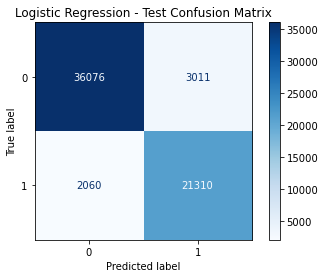

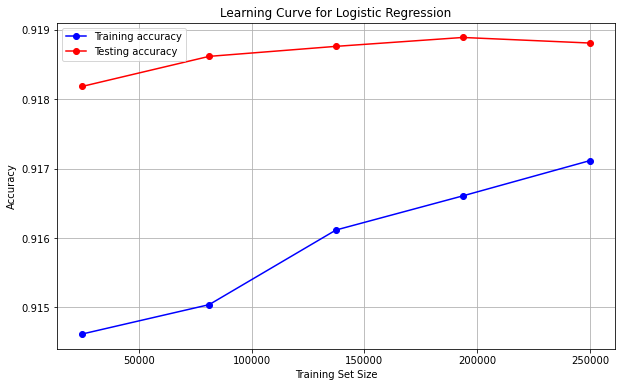

LogisticRegression(max_iter=200, solver='liblinear')

In [41]:
logit = define_logistic_regression()
run_model_with_learning_curve(logit, X_train, X_test, y_train, y_test, X_train.columns, model_name="Logistic Regression")


Selected Features for Random Forest (22 features):
Index(['z1_AC2(kW)', 'z1_AC4(kW)', 'z1_Plug(kW)', 'z1_S1(RH%)', 'z1_S1(lux)',
       'z2_AC1(kW)', 'z2_Light(kW)', 'z2_Plug(kW)', 'z2_S1(RH%)', 'z2_S1(lux)',
       'z3_Light(kW)', 'z3_Plug(kW)', 'z4_AC1(kW)', 'z4_Light(kW)',
       'z4_Plug(kW)', 'z4_S1(RH%)', 'z4_S1(lux)', 'z5_AC1(kW)', 'z5_Light(kW)',
       'z5_Plug(kW)', 'z5_S1(RH%)', 'z5_S1(lux)'],
      dtype='object')

Random Forest Training Time: 1.88 seconds

Test Classification Report:
               precision    recall  f1-score   support

           0     0.9678    0.9575    0.9626     39087
           1     0.9302    0.9467    0.9384     23370

    accuracy                         0.9535     62457
   macro avg     0.9490    0.9521    0.9505     62457
weighted avg     0.9537    0.9535    0.9536     62457


Test Confusion Matrix:
 [[37427  1660]
 [ 1246 22124]]


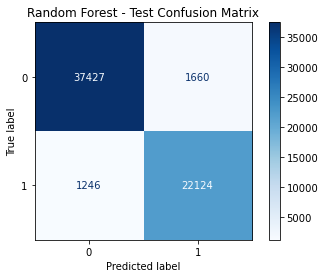

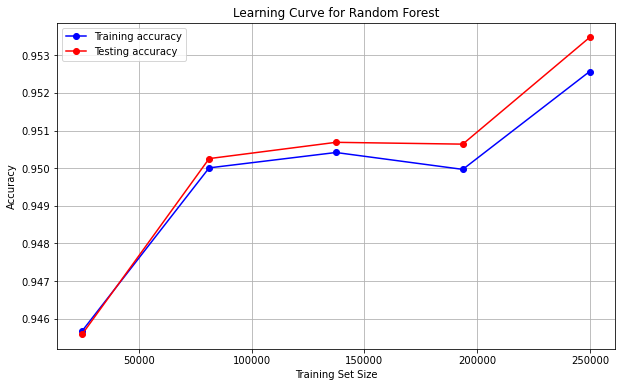

RandomForestClassifier(max_depth=4, n_estimators=10, n_jobs=-1, random_state=42)

In [42]:
rf = define_random_forest()
run_model_with_learning_curve(rf, X_train,  X_test, y_train, y_test, X_train.columns, model_name="Random Forest")


Selected Features for XGBoost (22 features):
Index(['z1_AC2(kW)', 'z1_AC4(kW)', 'z1_Plug(kW)', 'z1_S1(RH%)', 'z1_S1(lux)',
       'z2_AC1(kW)', 'z2_Light(kW)', 'z2_Plug(kW)', 'z2_S1(RH%)', 'z2_S1(lux)',
       'z3_Light(kW)', 'z3_Plug(kW)', 'z4_AC1(kW)', 'z4_Light(kW)',
       'z4_Plug(kW)', 'z4_S1(RH%)', 'z4_S1(lux)', 'z5_AC1(kW)', 'z5_Light(kW)',
       'z5_Plug(kW)', 'z5_S1(RH%)', 'z5_S1(lux)'],
      dtype='object')

XGBoost Training Time: 26.39 seconds

Test Classification Report:
               precision    recall  f1-score   support

           0     0.9983    0.9924    0.9953     39087
           1     0.9874    0.9971    0.9923     23370

    accuracy                         0.9942     62457
   macro avg     0.9928    0.9948    0.9938     62457
weighted avg     0.9942    0.9942    0.9942     62457


Test Confusion Matrix:
 [[38790   297]
 [   67 23303]]


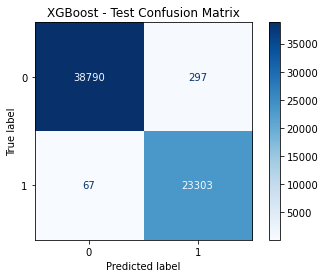

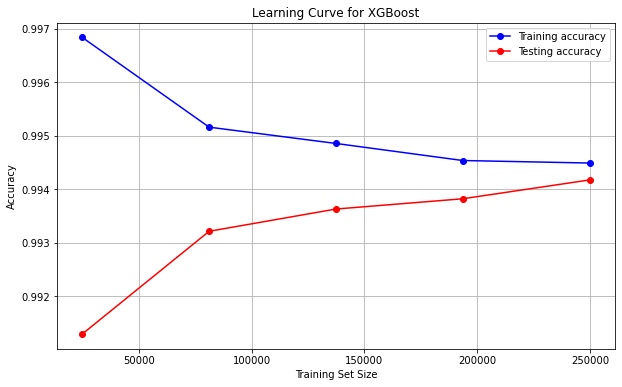

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [43]:
xgb = define_xgboost()
run_model_with_learning_curve(xgb, X_train,  X_test, y_train,  y_test, X_train.columns, model_name="XGBoost")


## Performance with Feature selection

Selected Features for Logistic Regression (15 features):
Index(['z1_AC2(kW)', 'z1_AC4(kW)', 'z1_Plug(kW)', 'z1_S1(RH%)', 'z1_S1(lux)',
       'z2_Light(kW)', 'z2_Plug(kW)', 'z2_S1(lux)', 'z3_Light(kW)',
       'z3_Plug(kW)', 'z4_Light(kW)', 'z4_S1(RH%)', 'z4_S1(lux)', 'z5_S1(RH%)',
       'z5_S1(lux)'],
      dtype='object')

Logistic Regression Training Time: 2.86 seconds

Test Classification Report:
               precision    recall  f1-score   support

           0     0.9383    0.9057    0.9217     39087
           1     0.8509    0.9004    0.8750     23370

    accuracy                         0.9037     62457
   macro avg     0.8946    0.9030    0.8983     62457
weighted avg     0.9056    0.9037    0.9042     62457


Test Confusion Matrix:
 [[35400  3687]
 [ 2327 21043]]


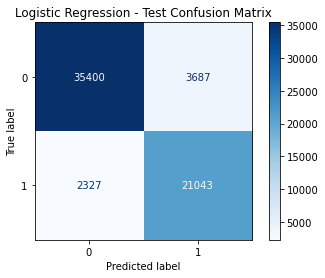

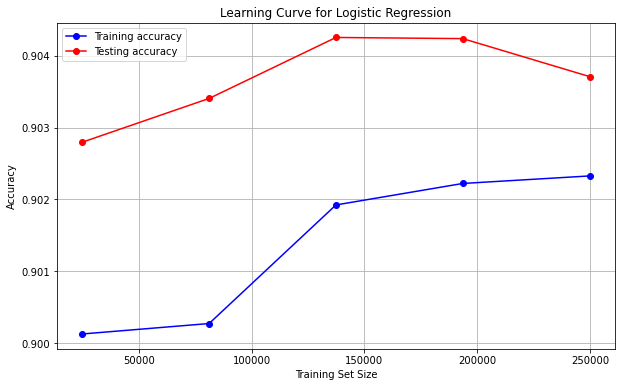

LogisticRegression(max_iter=200, solver='liblinear')

In [44]:
logit = define_logistic_regression()
run_model_with_learning_curve(logit, X_train, X_test, y_train, y_test, X_train_corr.columns, model_name="Logistic Regression")


Selected Features for Random Forest (15 features):
Index(['z1_AC2(kW)', 'z1_AC4(kW)', 'z1_Plug(kW)', 'z1_S1(RH%)', 'z1_S1(lux)',
       'z2_Light(kW)', 'z2_Plug(kW)', 'z2_S1(lux)', 'z3_Light(kW)',
       'z3_Plug(kW)', 'z4_Light(kW)', 'z4_S1(RH%)', 'z4_S1(lux)', 'z5_S1(RH%)',
       'z5_S1(lux)'],
      dtype='object')

Random Forest Training Time: 1.53 seconds

Test Classification Report:
               precision    recall  f1-score   support

           0     0.9585    0.9558    0.9571     39087
           1     0.9264    0.9308    0.9286     23370

    accuracy                         0.9464     62457
   macro avg     0.9425    0.9433    0.9429     62457
weighted avg     0.9465    0.9464    0.9465     62457


Test Confusion Matrix:
 [[37359  1728]
 [ 1617 21753]]


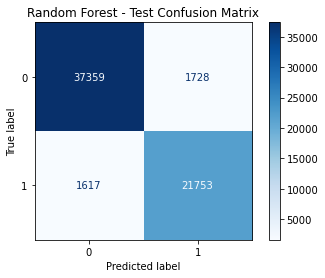

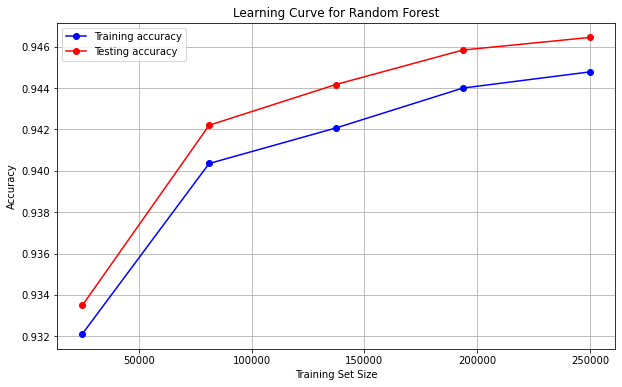

RandomForestClassifier(max_depth=4, n_estimators=10, n_jobs=-1, random_state=42)

In [45]:
rf = define_random_forest()
run_model_with_learning_curve(rf, X_train,  X_test, y_train, y_test,  X_train_corr.columns, model_name="Random Forest")


Selected Features for XGBoost (15 features):
Index(['z1_AC2(kW)', 'z1_AC4(kW)', 'z1_Plug(kW)', 'z1_S1(RH%)', 'z1_S1(lux)',
       'z2_Light(kW)', 'z2_Plug(kW)', 'z2_S1(lux)', 'z3_Light(kW)',
       'z3_Plug(kW)', 'z4_Light(kW)', 'z4_S1(RH%)', 'z4_S1(lux)', 'z5_S1(RH%)',
       'z5_S1(lux)'],
      dtype='object')

XGBoost Training Time: 18.34 seconds

Test Classification Report:
               precision    recall  f1-score   support

           0     0.9958    0.9883    0.9920     39087
           1     0.9806    0.9930    0.9868     23370

    accuracy                         0.9900     62457
   macro avg     0.9882    0.9906    0.9894     62457
weighted avg     0.9901    0.9900    0.9900     62457


Test Confusion Matrix:
 [[38628   459]
 [  164 23206]]


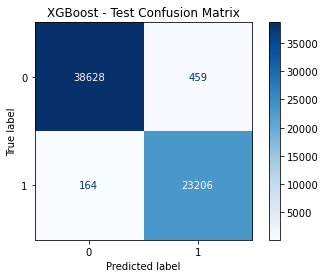

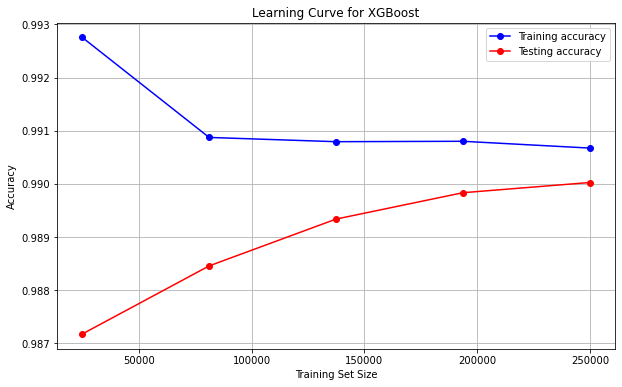

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [46]:
xgb = define_xgboost()
run_model_with_learning_curve(xgb, X_train,  X_test, y_train,  y_test,  X_train_corr.columns, model_name="XGBoost")
